## Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)

(60000, 28, 28)


## Instantiate, compile, and train the model.

In [5]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)), #is input_shape, not shape -- check documentation
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2922 - accuracy: 0.9147 - val_loss: 0.1414 - val_accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1434 - accuracy: 0.9573 - val_loss: 0.0988 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1064 - accuracy: 0.9680 - val_loss: 0.0910 - val_accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9729 - val_loss: 0.0822 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0744 - accuracy: 0.9761 - val_loss: 0.0827 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9789 - val_loss: 0.0757 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9811 - val_loss: 0.0728 - val_accuracy

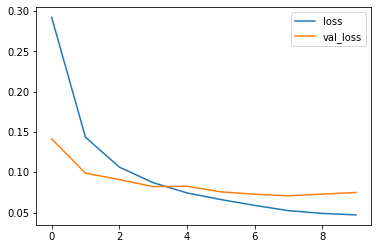

In [8]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show();

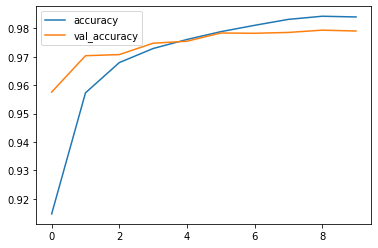

In [9]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show();

## Making Predictions

In [10]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9791
[0.07495605945587158, 0.9790999889373779]


Confusion matrix, without normalization
[[ 972    1    2    0    0    1    2    1    1    0]
 [   0 1121    5    1    1    0    2    2    3    0]
 [   2    0 1020    1    0    0    2    2    5    0]
 [   0    0    8  991    0    4    0    4    1    2]
 [   1    0    2    0  958    1    6    3    1   10]
 [   2    1    1   11    1  866    2    1    5    2]
 [   4    2    1    1    4    4  941    1    0    0]
 [   2    1   15    2    0    0    0 1002    0    6]
 [  10    0    7    3    4    4    1    4  938    3]
 [   2    4    0    5    5    3    0    7    1  982]]


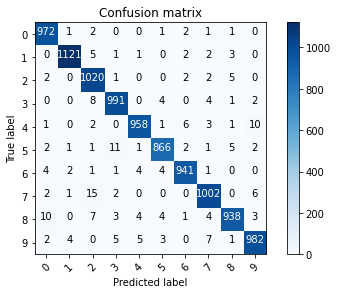

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [12]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]

In [13]:
print(misclassified_idx)

[ 115  121  151  247  259  266  321  340  381  445  495  582  619  684
  691  720  810  844  846  947  951  956  965 1014 1039 1112 1128 1178
 1226 1232 1242 1247 1260 1299 1319 1326 1393 1494 1522 1527 1530 1549
 1553 1609 1681 1709 1717 1754 1790 1800 1878 1901 1941 1952 1955 1982
 2004 2016 2018 2024 2035 2070 2093 2109 2118 2125 2130 2135 2182 2189
 2224 2266 2272 2291 2293 2329 2369 2387 2414 2462 2597 2607 2648 2654
 2771 2810 2836 2877 2896 2921 2939 2953 3005 3060 3062 3073 3117 3225
 3503 3520 3549 3558 3559 3597 3662 3718 3727 3751 3776 3778 3780 3808
 3853 3906 3941 4065 4075 4078 4140 4152 4176 4199 4201 4207 4224 4248
 4271 4289 4294 4382 4443 4497 4536 4639 4731 4736 4761 4807 4814 4823
 4860 4880 4956 5331 5457 5586 5642 5734 5749 5757 5887 5888 5926 5936
 5937 5955 5973 5982 6011 6059 6166 6555 6558 6571 6574 6597 6625 6632
 6641 6651 6783 6847 7216 7432 7434 7732 7800 7821 7849 7905 7921 8020
 8091 8094 8246 8277 8311 8325 8408 8456 8527 9009 9015 9019 9024 9253
 9280 

In [14]:
i = np.random.choice(misclassified_idx)

In [15]:
print(i)

1014


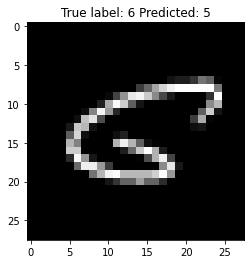

In [16]:
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));